In [2]:
import pandas as pd
import numpy as np

# Graphical analysis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# for model building
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
data=pd.read_excel('News2cbr.xlsx')
data.shape

(127, 14)

In [4]:
data.head()

,LL,PL,PI,OMC,SG,MDD,TS,P1,P2,P3,P4,NO. OF LAYER,Lab Error,CBR
0,0.0,0.0,0.0,11.0,2.63,3.36,20.0,0.0,0.0,0.8,0.0,1,1,103.0
1,0.0,0.0,0.0,10.0,2.63,5.36,20.0,0.0,0.5,0.0,0.0,1,1,74.0
2,0.0,0.0,0.0,10.0,2.63,4.83,20.0,0.0,0.0,0.8,0.0,1,1,104.0
3,0.0,0.0,0.0,11.0,2.63,4.98,20.0,0.0,0.5,0.0,0.0,1,1,75.0
4,0.0,0.0,0.0,12.0,2.63,3.97,20.0,0.0,0.0,0.8,0.0,1,1,105.0


In [5]:
data.describe()

,LL,PL,PI,OMC,SG,MDD,TS,P1,P2,P3,P4,NO. OF LAYER,Lab Error,CBR
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.0,127.000000
mean,37.108661,23.791969,13.959213,16.869449,2.652362,11.950677,18.893228,0.180709,0.249764,0.261102,0.138583,1.779528,1.0,17.204606
std,23.903580,15.192163,11.429143,7.836010,0.042733,6.444168,8.236531,0.183749,0.264610,0.331713,0.303955,1.160961,0.0,21.631161
min,0.000000,0.000000,0.000000,8.300000,2.600000,0.001900,2.810000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000
25%,18.000000,14.000000,4.000000,12.000000,2.630000,4.900000,13.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,3.405000
50%,45.000000,28.000000,11.000000,13.900000,2.630000,13.330000,20.000000,0.200000,0.400000,0.000000,0.000000,1.000000,1.0,8.720000
75%,55.000000,35.000000,23.000000,18.000000,2.690000,17.120000,20.000000,0.200000,0.400000,0.600000,0.000000,2.000000,1.0,22.795000
max,71.000000,45.000000,35.000000,35.000000,2.770000,19.620000,40.000000,0.840000,0.840000,0.840000,0.800000,4.000000,1.0,105.000000


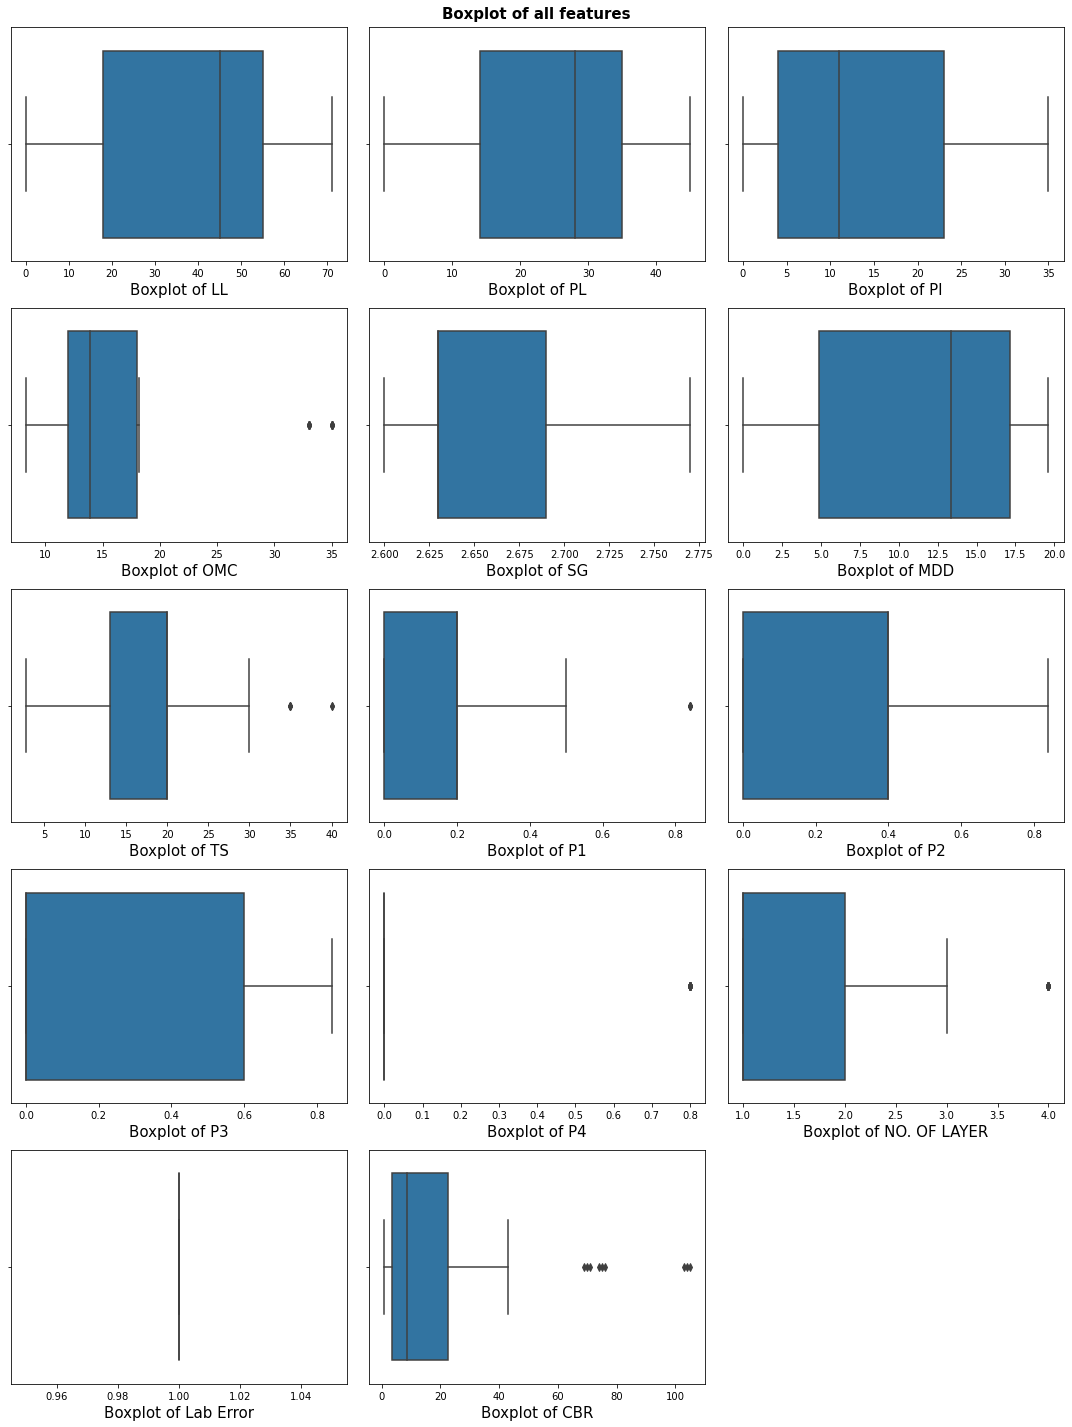

In [6]:
#check the outliers
plt.figure(figsize=(15,20),facecolor='White')
plt.suptitle("Boxplot of all features", fontweight = 'bold', fontsize = 15,y = 0.989)
for i in range(0,len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x = data.columns[i], data = data)
    plt.xlabel("Boxplot of {}".format(data.columns[i]),fontsize = 15)
    plt.tight_layout()

In [7]:
data.describe().T # describe data points

,count,mean,std,min,25%,50%,75%,max
LL,127.0,37.108661,23.903580,0.0000,18.000,45.00,55.000,71.00
PL,127.0,23.791969,15.192163,0.0000,14.000,28.00,35.000,45.00
PI,127.0,13.959213,11.429143,0.0000,4.000,11.00,23.000,35.00
OMC,127.0,16.869449,7.836010,8.3000,12.000,13.90,18.000,35.00
SG,127.0,2.652362,0.042733,2.6000,2.630,2.63,2.690,2.77
MDD,127.0,11.950677,6.444168,0.0019,4.900,13.33,17.120,19.62
TS,127.0,18.893228,8.236531,2.8100,13.000,20.00,20.000,40.00
P1,127.0,0.180709,0.183749,0.0000,0.000,0.20,0.200,0.84
P2,127.0,0.249764,0.264610,0.0000,0.000,0.40,0.400,0.84
P3,127.0,0.261102,0.331713,0.0000,0.000,0.00,0.600,0.84


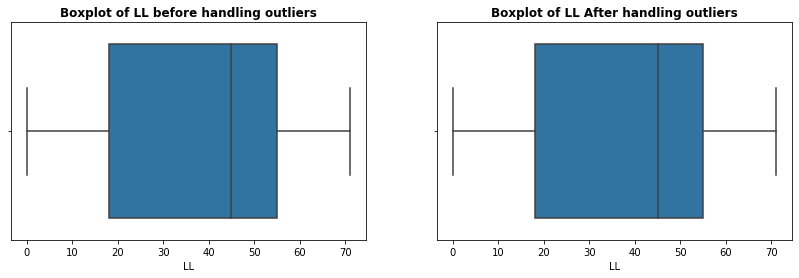

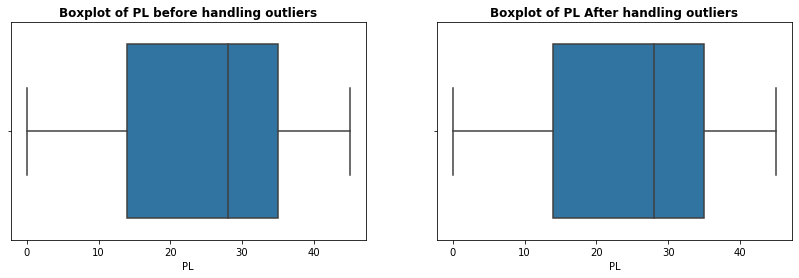

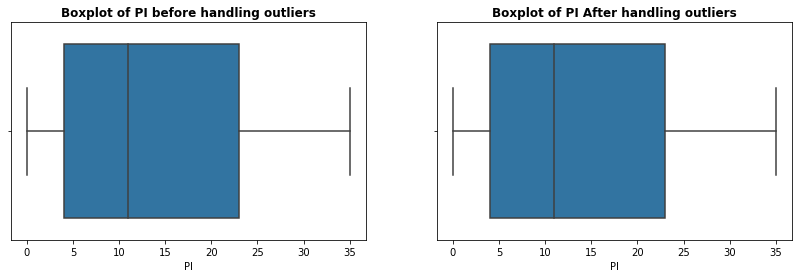

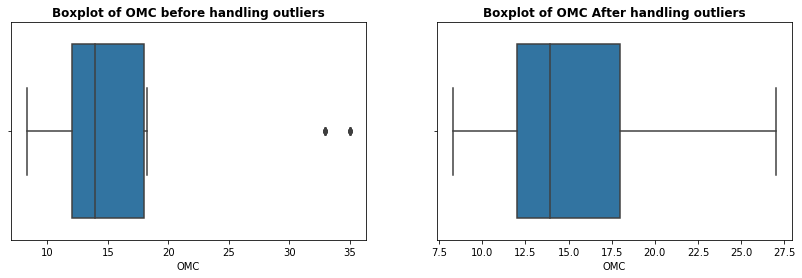

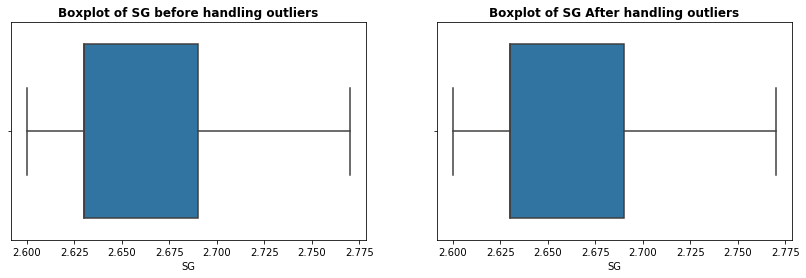

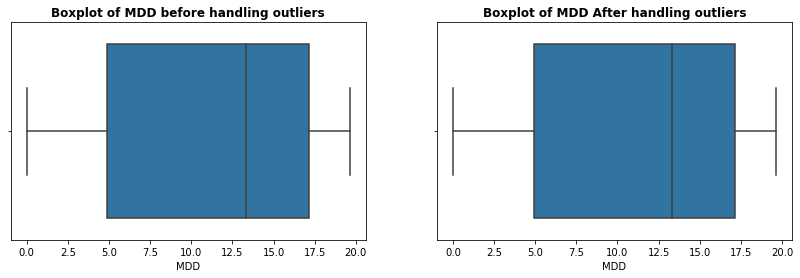

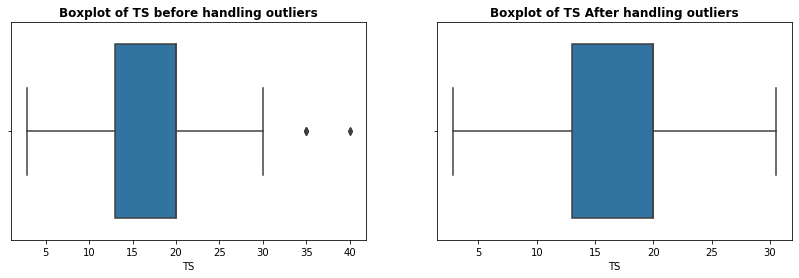

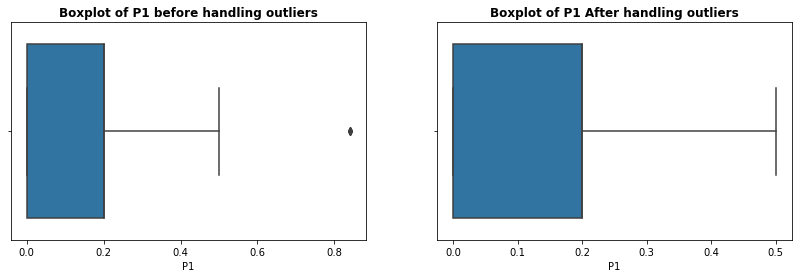

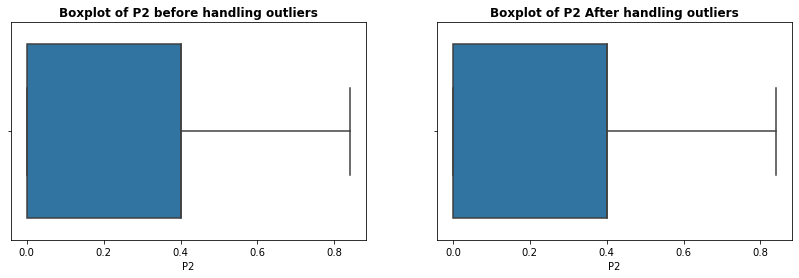

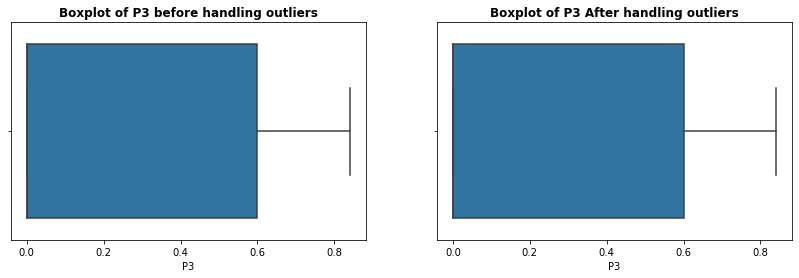

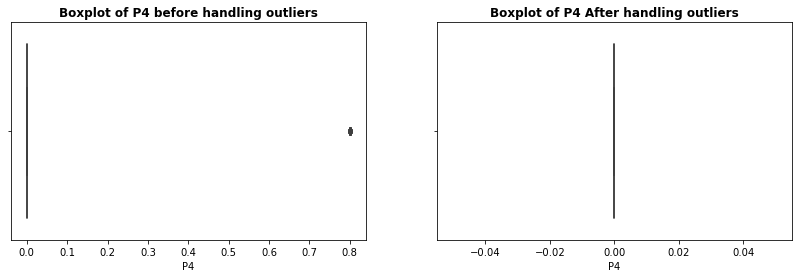

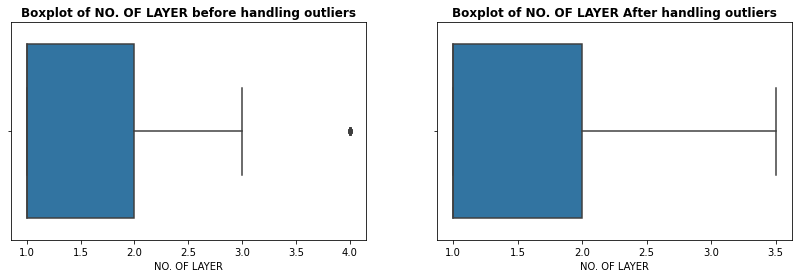

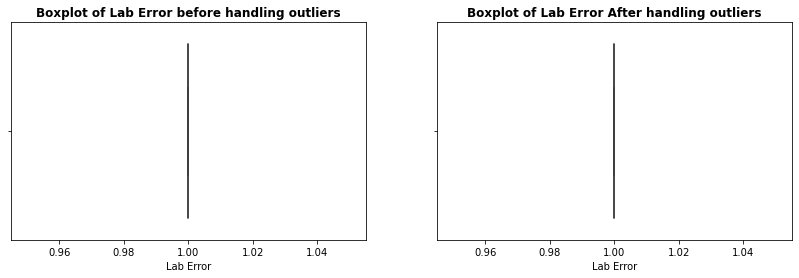

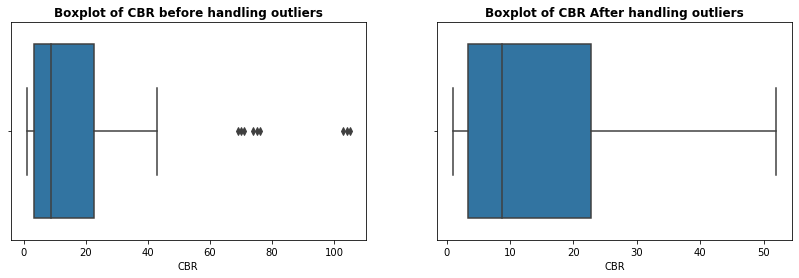

In [8]:
df1 = data.copy()
feature_to_use = df1.columns

for i in range(len(feature_to_use)):
    IQR = df1[feature_to_use[i]].quantile(0.75) - df1[feature_to_use[i]].quantile(0.25)
    Lower_Limit = df1[feature_to_use[i]].quantile(0.25) - (1.5*IQR)
    UPPER_LIMIT = df1[feature_to_use[i]].quantile(0.75) + (1.5*IQR)
    df1[feature_to_use[i]]= np.where(df1[feature_to_use[i]]>UPPER_LIMIT,UPPER_LIMIT,
                                np.where(df1[feature_to_use[i]]<Lower_Limit,Lower_Limit,df1[feature_to_use[i]]))


for fea in feature_to_use:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.boxplot(x = fea, data = data)
    plt.title("Boxplot of {} before handling outliers".format(fea),fontweight = 'bold')

    plt.subplot(122)
    sns.boxplot(x = fea, data = df1)
    plt.title("Boxplot of {} After handling outliers".format(fea),fontweight = 'bold')
    plt.show()

In [9]:
x = df1.iloc[:,:-1]
y = df1['CBR']

In [10]:
x.shape,y.shape


((127, 13), (127,))

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42 )

In [12]:
x_train.shape,y_train.shape

((88, 13), (88,))

In [13]:
x_test.shape,y_test.shape

((39, 13), (39,))

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [15]:
report = []

In [16]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge Regression" : Ridge(),
    "Lasso Regression" : Lasso(),
    "Support Vector Regression" : SVR(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)   # Training Model

    # Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training Data perfomance Matrix
    model_train_mse = mean_squared_error(y_train,y_train_pred)   # Calculate MSE
    model_train_mae = mean_absolute_error(y_train,y_train_pred)  # Calculate MAE
    model_train_r2 = r2_score(y_train,y_train_pred)              # Calculate 2 sqaure
    model_train_ad_r2 = 1 - (1-model_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)

    
    # Test Data perfomance Matrix
    model_test_mse = mean_squared_error(y_test,y_test_pred)   # Calculate MSE
    model_test_mae = mean_absolute_error(y_test,y_test_pred)  # Calculate MAE
    model_test_r2 = r2_score(y_test,y_test_pred)              # Calculate 2 sqaure
    model_test_ad_r2 = 1 - (1-model_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)
    # print("\n")
    # print((list(models.keys()))[i])

    # print("Model Performance For Training Data")
    # print("-Mean Squared Error : {:4f}".format(model_train_mse))
    # print("-Mean Absolute Error : {:.4f}".format(model_train_mae))
    # print("-R Sqaure : {:.4f}".format(model_train_r2))
    # print("-Adj R Sqaure : {:.4f}".format(model_train_ad_r2))

    # print("-----------------------------------------------------------------------")

    # print("Model Performance For Test Data")
    # print("-Mean Squared Error : {:4f}".format(model_test_mse))
    # print("-Mean Absolute Error : {:.4f}".format(model_test_mae))
    # print("-R Sqaure : {:.4f}".format(model_test_r2))
    # print("-Adj R Sqaure : {:.4f}".format(model_test_ad_r2))

    # print("="*80)

    report.append({
                    "model" : (list(models.keys()))[i],
                    'Train Mean Squared Error ' : model_train_mse,
                    'Test Mean Squared Error' : model_test_mse,
                    'Train Mean Absolute Error' : model_train_mae,
                    'Test Mean Absolute Error' : model_test_mae,
                    'Train R Sqaure' : model_train_r2,
                    'Test R Sqaure' : model_test_r2,
                    'Train Adj R Sqaure' : model_train_ad_r2,
                    'Test Adj R Sqaure' : model_test_ad_r2
    })

all_model = pd.DataFrame(report)
all_model

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Linear Regression,58.440082,64.411881,5.761506,6.846629,0.745825,0.683190,0.701173,0.518449
1,Ridge Regression,61.900434,73.858068,5.959998,7.038084,0.730775,0.636729,0.683479,0.447828
2,Lasso Regression,84.232995,79.440942,7.437426,6.795504,0.633643,0.609269,0.569284,0.406089
3,Support Vector Regression,174.770168,176.125139,8.452850,8.928762,0.239868,0.133728,0.106331,-0.316734
4,Decision Tree Regressor,2.207590,117.194931,0.500943,5.991045,0.990398,0.423576,0.988712,0.123836
5,Random Forest Regressor,4.222787,72.601023,1.247492,4.967582,0.981634,0.642912,0.978407,0.457226


In [17]:
report2 = []
# Bagging using DecisionTreeRegressor
dt_bag = BaggingRegressor(n_estimators=100)
#If None, then the base estimator is a DecisionTreeRegressor.
dt_bag.fit(x_train,y_train)

# Make predictions
train_pred_bag =dt_bag.predict(x_train)
test_pred_bag = dt_bag.predict(x_test)

# Training dataset performance matrix
bag_train_mse = mean_squared_error(y_train,train_pred_bag)   # Calculate MSE
bag_train_mae = mean_absolute_error(y_train,train_pred_bag)  # Calculate MAE
bag_train_r2 = r2_score(y_train,train_pred_bag)              # Calculate 2 sqaure
bag_train_ad_r2 = 1 - (1-bag_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)


# Test Data perfomance Matrix
bag_test_mse = mean_squared_error(y_test,test_pred_bag)   # Calculate MSE
bag_test_mae = mean_absolute_error(y_test,test_pred_bag)  # Calculate MAE
bag_test_r2 = r2_score(y_test,test_pred_bag)              # Calculate 2 sqaure
bag_test_ad_r2 = 1 - (1-bag_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)

# # print("\n")
# print("Bagging Regressor")

# print("Model Performance For Training Data")
# print("-Mean Squared Error : {:4f}".format(bag_train_mse))
# print("-Mean Absolute Error : {:.4f}".format(bag_train_mae))
# print("-R Sqaure : {:.4f}".format(bag_train_r2))
# print("-Adj R Sqaure : {:.4f}".format(bag_train_ad_r2))

# print("-----------------------------------------------------------------------")

# print("Model Performance For Test Data")
# print("-Mean Squared Error : {:4f}".format(bag_test_mse))
# print("-Mean Absolute Error : {:.4f}".format(bag_test_mae))
# print("-R Sqaure : {:.4f}".format(bag_test_r2))
# print("-Adj R Sqaure : {:.4f}".format(bag_test_ad_r2))

report2.append({
                "model" : 'Bagging Regressor',
                'Train Mean Squared Error ' : bag_train_mse,
                'Test Mean Squared Error' : bag_test_mse,
                'Train Mean Absolute Error' : bag_train_mae,
                'Test Mean Absolute Error' : bag_test_mae,
                'Train R Sqaure' : bag_train_r2,
                'Test R Sqaure' : bag_test_r2,
                'Train Adj R Sqaure' : bag_train_ad_r2,
                'Test Adj R Sqaure' : bag_test_ad_r2
})

Bagging_report = pd.DataFrame(report2)
Bagging_report

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Bagging Regressor,4.729376,71.481741,1.323121,4.877401,0.97943,0.648417,0.975817,0.465593


In [18]:
frames3 = [all_model,Bagging_report]
all_records = pd.concat(frames3) 
all_records.reset_index(inplace=True)
all_records.drop('index',axis = 1,inplace = True)
all_records.sort_values(by = 'Test R Sqaure',ascending=False)

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Linear Regression,58.440082,64.411881,5.761506,6.846629,0.745825,0.683190,0.701173,0.518449
6,Bagging Regressor,4.729376,71.481741,1.323121,4.877401,0.979430,0.648417,0.975817,0.465593
5,Random Forest Regressor,4.222787,72.601023,1.247492,4.967582,0.981634,0.642912,0.978407,0.457226
1,Ridge Regression,61.900434,73.858068,5.959998,7.038084,0.730775,0.636729,0.683479,0.447828
2,Lasso Regression,84.232995,79.440942,7.437426,6.795504,0.633643,0.609269,0.569284,0.406089
4,Decision Tree Regressor,2.207590,117.194931,0.500943,5.991045,0.990398,0.423576,0.988712,0.123836
3,Support Vector Regression,174.770168,176.125139,8.452850,8.928762,0.239868,0.133728,0.106331,-0.316734
